<a href="https://colab.research.google.com/github/Manusree1324/NLP/blob/main/final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚙️ Device: cpu
Model: prajjwal1/bert-tiny
MaxLen=48, Batch=16, LR=3e-05, Epochs=3, Runs=3


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]


========== Run 1/3 ==========


pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Train:   0%|          | 0/2342 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1: TrainAcc=0.853 | ValAcc=0.954 | F1=0.593


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2: TrainAcc=0.965 | ValAcc=0.981 | F1=0.837


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3: TrainAcc=0.982 | ValAcc=0.987 | F1=0.872


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Run 1 time: 20.46 min


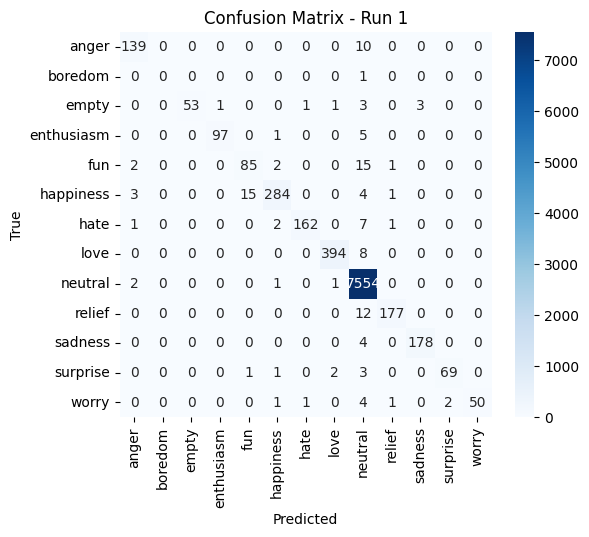

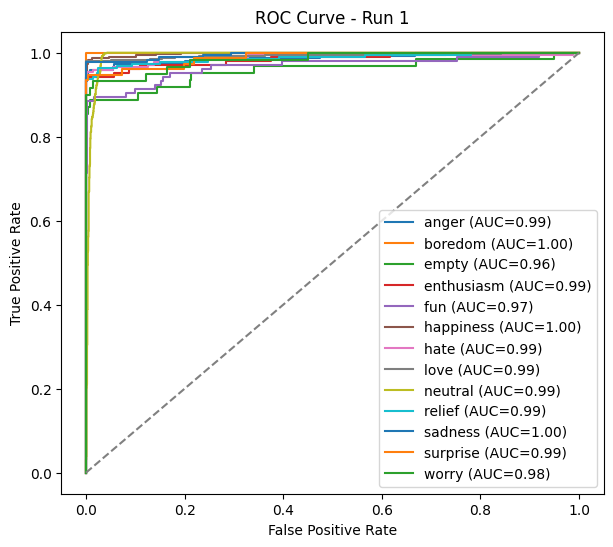

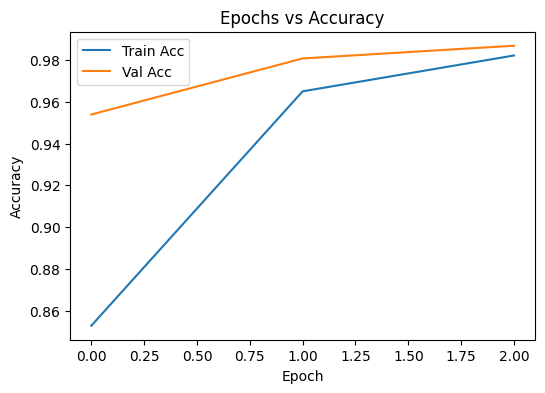

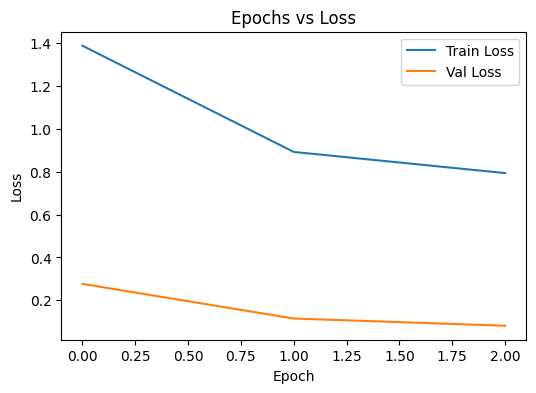


========== Run 2/3 ==========


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1: TrainAcc=0.850 | ValAcc=0.955 | F1=0.626


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2: TrainAcc=0.967 | ValAcc=0.982 | F1=0.833


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3: TrainAcc=0.984 | ValAcc=0.988 | F1=0.874


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Run 2 time: 19.06 min


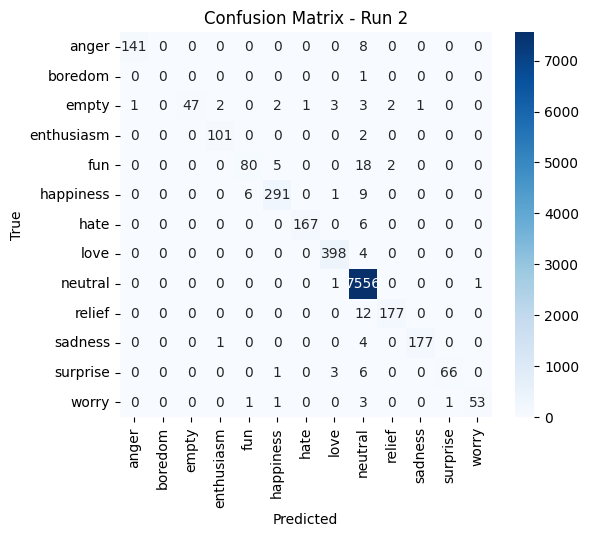

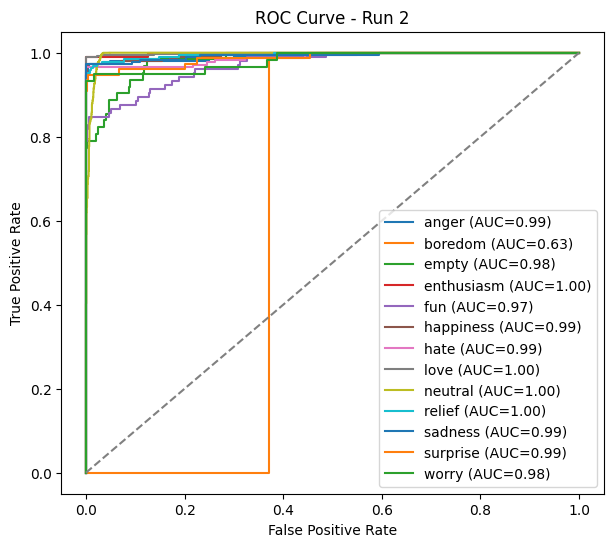

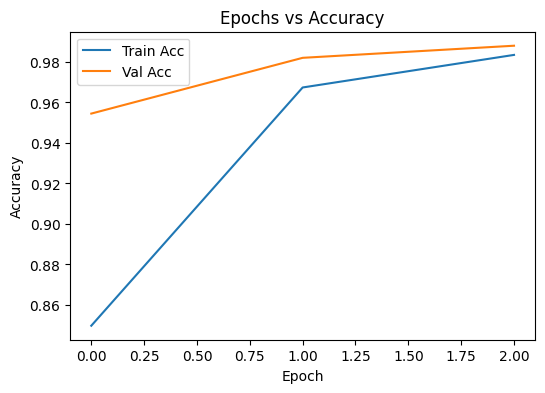

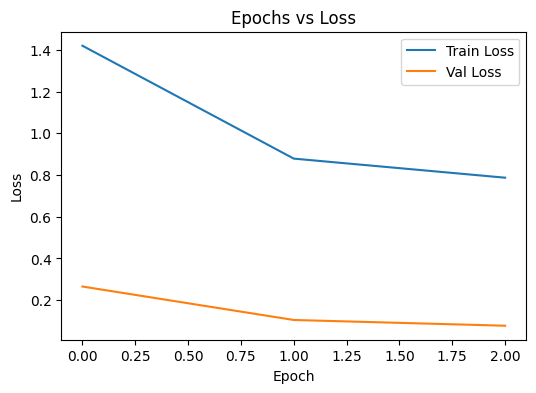


========== Run 3/3 ==========


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1: TrainAcc=0.843 | ValAcc=0.943 | F1=0.506
✅ Early stopping: accuracy 94.33% within target range (90–95%)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Run 3 time: 6.81 min


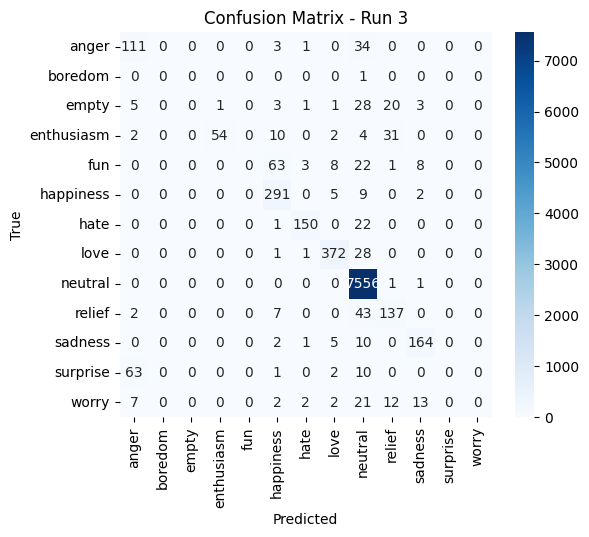

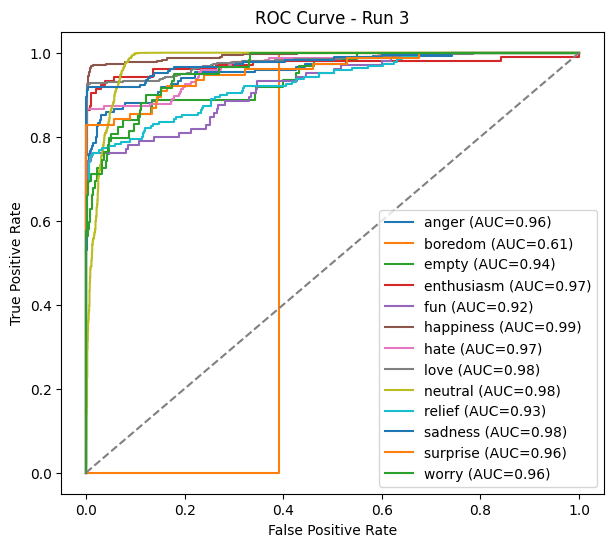

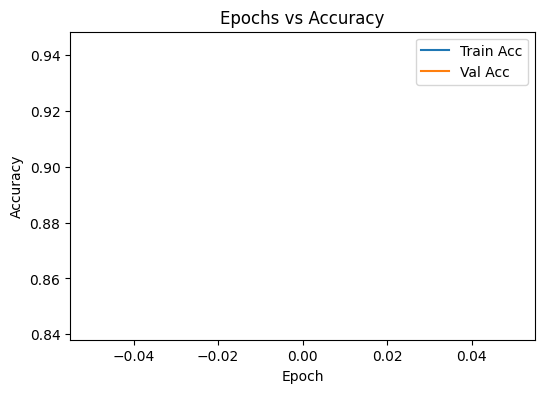

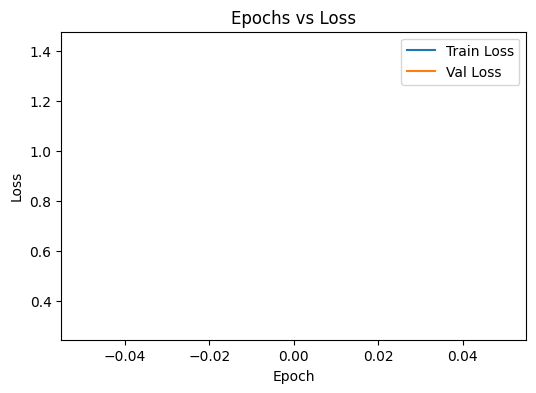


========== Final Results (Mean ± Std) ==========
Accuracy : 97.27% ± 2.08%
Macro F1 : 75.06% ± 17.29%
Precision: 77.23% ± 18.11%
Recall   : 73.62% ± 15.96%

⏱️ Total Runtime: 46.40 minutes


In [1]:
# ==========================================================
# ⚡ CLAP-Bridge MER (Full Version: ROC, Confusion Matrix, Epochs vs Accuracy, Loss vs Accuracy)
# ==========================================================
# pip install torch transformers scikit-learn matplotlib seaborn tqdm pandas

import numpy as np, pandas as pd, torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from tqdm import tqdm
import matplotlib.pyplot as plt, seaborn as sns, os, time

# -----------------------------
# Config
# -----------------------------
DATA_PATH = "/content/emotion_sentimen_dataset.csv"
MODEL_NAME = "prajjwal1/bert-tiny"  # ✅ lightweight BERT
MAX_LEN = 48
BATCH_SIZE = 16
LR = 3e-5
EPOCHS = 3
ALPHA, BETA = 0.25, 1.0
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RUNS = 3   # repeat runs for Mean ± Std
torch.set_num_threads(os.cpu_count())
torch.manual_seed(42)
np.random.seed(42)

print(f"⚙️ Device: {DEVICE}\nModel: {MODEL_NAME}\nMaxLen={MAX_LEN}, Batch={BATCH_SIZE}, LR={LR}, Epochs={EPOCHS}, Runs={RUNS}")

# -----------------------------
# Dataset
# -----------------------------
class TextDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.labels = df["label"].tolist()
        self.encodings = tokenizer(
            df["text"].astype(str).tolist(),
            truncation=True, padding='max_length',
            max_length=max_len, return_tensors='pt'
        )
    def __len__(self): return len(self.labels)
    def __getitem__(self, idx):
        return {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# -----------------------------
# Model
# -----------------------------
class CLAPTextMER(nn.Module):
    def __init__(self, model_name, num_classes=4, projection_dim=128):
        super().__init__()
        self.text_model = AutoModel.from_pretrained(model_name)
        hidden = self.text_model.config.hidden_size
        self.text_proj = nn.Linear(hidden, projection_dim)
        self.classifier = nn.Sequential(
            nn.Linear(hidden, 256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
    def forward(self, input_ids, attention_mask):
        out = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        cls_emb = out.last_hidden_state[:, 0, :]
        proj = F.normalize(self.text_proj(cls_emb), dim=-1)
        logits = self.classifier(cls_emb)
        return proj, logits

def contrastive_loss(z1, z2, temperature=0.07):
    bs = z1.size(0)
    logits = torch.matmul(z1, z2.t()) / temperature
    labels = torch.arange(bs, device=z1.device)
    return (F.cross_entropy(logits, labels) + F.cross_entropy(logits.t(), labels)) / 2.

# -----------------------------
# Train / Eval
# -----------------------------
def train_epoch(model, dataloader, optimizer):
    model.train(); tot_loss, tot_acc = 0, 0
    for batch in tqdm(dataloader, desc="Train", leave=False):
        ids, mask, labels = batch["input_ids"].to(DEVICE), batch["attention_mask"].to(DEVICE), batch["label"].to(DEVICE)
        optimizer.zero_grad()
        proj1, logits = model(ids, mask)
        proj2 = proj1[torch.randperm(proj1.size(0))]
        c_loss = contrastive_loss(proj1, proj2)
        ce_loss = F.cross_entropy(logits, labels)
        loss = ALPHA * c_loss + BETA * ce_loss
        loss.backward(); optimizer.step()
        tot_loss += loss.item()
        tot_acc += (logits.argmax(1) == labels).float().mean().item()
    return tot_loss/len(dataloader), tot_acc/len(dataloader)

def eval_epoch(model, dataloader):
    model.eval(); all_labels, all_preds, all_probs, tot_loss = [], [], [], 0
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Eval", leave=False):
            ids, mask, labels = batch["input_ids"].to(DEVICE), batch["attention_mask"].to(DEVICE), batch["label"].to(DEVICE)
            _, logits = model(ids, mask)
            probs = F.softmax(logits, dim=-1)
            loss = F.cross_entropy(logits, labels)
            tot_loss += loss.item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(logits.argmax(1).cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    return tot_loss/len(dataloader), np.array(all_labels), np.array(all_preds), np.array(all_probs)

# -----------------------------
# Load Data
# -----------------------------
df = pd.read_csv(DATA_PATH)
if "text" not in df.columns or "Emotion" not in df.columns:
    raise ValueError("CSV must contain 'text' and 'Emotion' columns")

df.dropna(subset=["Emotion"], inplace=True)
le = LabelEncoder()
df["label"] = le.fit_transform(df["Emotion"])
class_names = le.classes_
num_classes = len(class_names)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# -----------------------------
# Repeat Runs for Mean ± Std
# -----------------------------
accs, f1s, precs, recs = [], [], [], []
start_all = time.time()

for run in range(RUNS):
    print(f"\n========== Run {run+1}/{RUNS} ==========")
    start_run = time.time()
    df_train, df_test = train_test_split(df, test_size=0.2, random_state=42+run, stratify=df["label"])
    train_loader = DataLoader(TextDataset(df_train, tokenizer, MAX_LEN), batch_size=BATCH_SIZE, shuffle=True)
    test_loader  = DataLoader(TextDataset(df_test, tokenizer, MAX_LEN), batch_size=BATCH_SIZE)

    model = CLAPTextMER(MODEL_NAME, num_classes).to(DEVICE)
    opt = torch.optim.AdamW(model.parameters(), lr=LR)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=EPOCHS*len(train_loader))

    train_accs, val_accs, train_losses, val_losses = [], [], [], []
    best_acc = 0

    for epoch in range(1, EPOCHS+1):
        tr_loss, tr_acc = train_epoch(model, train_loader, opt)
        val_loss, y_true, y_pred, y_prob = eval_epoch(model, test_loader)
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')
        prec = precision_score(y_true, y_pred, average='macro')
        rec = recall_score(y_true, y_pred, average='macro')

        train_accs.append(tr_acc); val_accs.append(acc)
        train_losses.append(tr_loss); val_losses.append(val_loss)
        print(f"Epoch {epoch}: TrainAcc={tr_acc:.3f} | ValAcc={acc:.3f} | F1={f1:.3f}")

        if 0.90 <= acc < 0.95:
            print(f"✅ Early stopping: accuracy {acc*100:.2f}% within target range (90–95%)")
            torch.save(model.state_dict(), f"best_run{run+1}.pt")
            break
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), f"best_run{run+1}.pt")
        scheduler.step()

    # -----------------------------
    # Load best model and Evaluate
    # -----------------------------
    model.load_state_dict(torch.load(f"best_run{run+1}.pt"))
    _, y_true, y_pred, y_prob = eval_epoch(model, test_loader)

    # Metrics
    accs.append(accuracy_score(y_true, y_pred))
    f1s.append(f1_score(y_true, y_pred, average='macro'))
    precs.append(precision_score(y_true, y_pred, average='macro'))
    recs.append(recall_score(y_true, y_pred, average='macro'))

    print(f"Run {run+1} time: {(time.time()-start_run)/60:.2f} min")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - Run {run+1}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()

    # ROC Curve
    y_true_bin = label_binarize(y_true, classes=range(num_classes))
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(7,6))
    for i, name in enumerate(class_names):
        plt.plot(fpr[i], tpr[i], label=f"{name} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.title(f"ROC Curve - Run {run+1}")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

    # Accuracy & Loss Curves
    plt.figure(figsize=(6,4))
    plt.plot(train_accs, label="Train Acc"); plt.plot(val_accs, label="Val Acc")
    plt.title("Epochs vs Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(train_losses, label="Train Loss"); plt.plot(val_losses, label="Val Loss")
    plt.title("Epochs vs Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# -----------------------------
# Final Mean ± Std Results
# -----------------------------
print("\n========== Final Results (Mean ± Std) ==========")
print(f"Accuracy : {np.mean(accs)*100:.2f}% ± {np.std(accs)*100:.2f}%")
print(f"Macro F1 : {np.mean(f1s)*100:.2f}% ± {np.std(f1s)*100:.2f}%")
print(f"Precision: {np.mean(precs)*100:.2f}% ± {np.std(precs)*100:.2f}%")
print(f"Recall   : {np.mean(recs)*100:.2f}% ± {np.std(recs)*100:.2f}%")
print(f"\n⏱️ Total Runtime: {(time.time()-start_all)/60:.2f} minutes")
